This Python script performs sentiment analysis on Reddit comments related to specific antihero characters. 
### 
It used the `praw` library to interact with the Reddit API, fetching comments from designated subreddits that mention each character (Shen Gongbao, Eren Yeager, and Sephiroth). The script then uses the NLTK library, including the VADER lexicon and stopwords, to calculate sentiment scores for each comment and clean the text by removing non-word characters and common English stopwords. The `pandas` library is used to organize the collected data into DataFrames, which are then saved as CSV files. Additionally, `matplotlib` and `seaborn` are employed to visualize the sentiment distribution for each character's comments using histograms. This script automates the process of collecting, analyzing, and visualizing sentiment data from Reddit discussions about these three fictional characters, saving the output to individual csv files and outputting histogram charts.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data for Shen Gongbao saved to shen_gongbao_comments_sentiment.csv


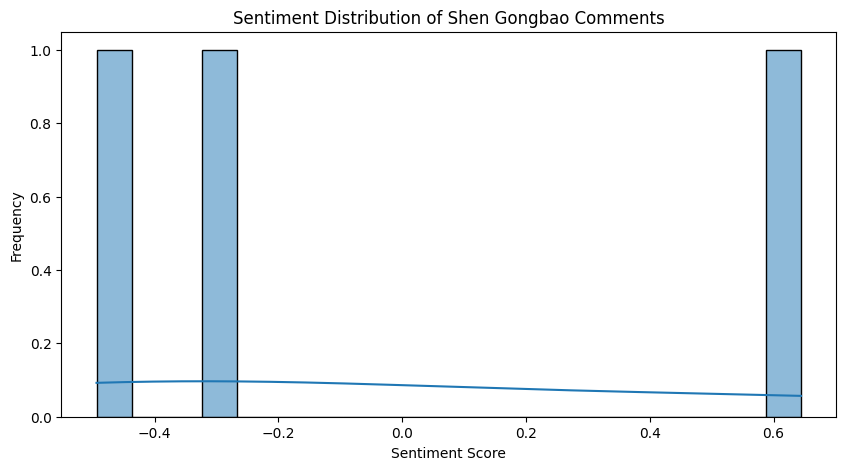

Data for Eren Yeager saved to eren_yeager_comments_sentiment.csv


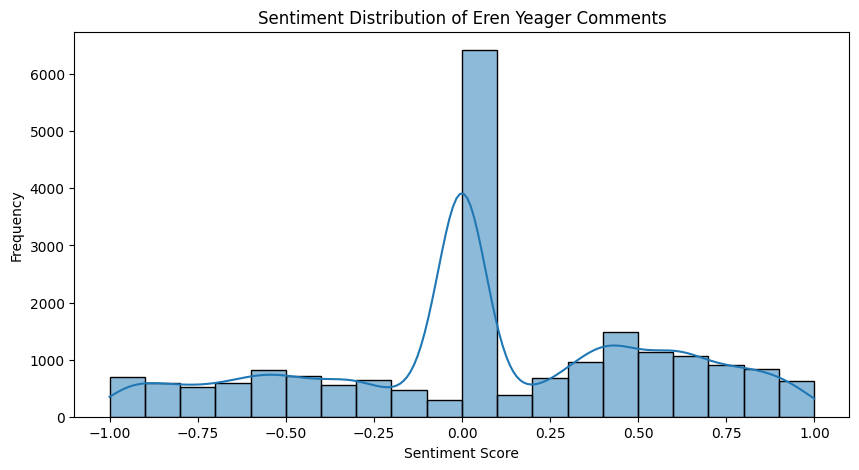

Data for Sephiroth saved to sephiroth_comments_sentiment.csv


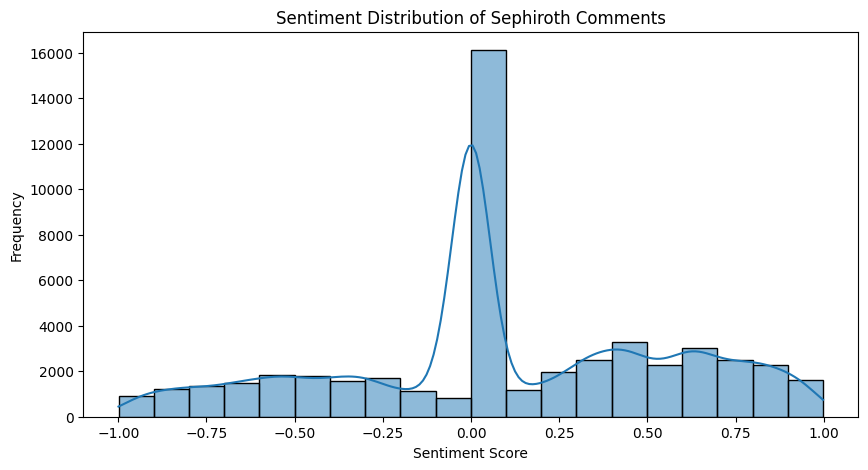

Data saved to sephiroth_comments_sentiment.csv


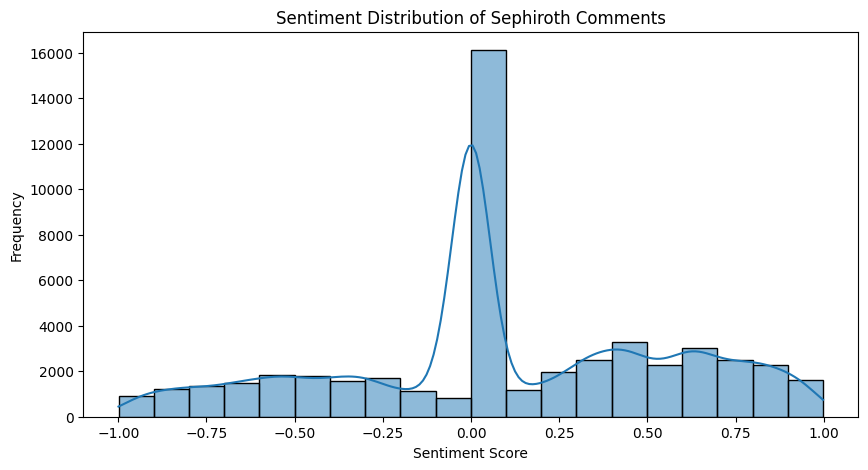

In [1]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from datetime import datetime
import nltk
import re
# download the VADER lexicon and the stopwords from the NLTK (Natural Language Toolkit) library
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize Reddit instance
reddit = praw.Reddit(
    client_id="C2RZlEvyR993CuZv8SqqqA",  # Replace with client_id
    client_secret="0OmbYfbe2lY4YzT_MAcKMI6WTq7P8Q",  # Replace with client_secret
    user_agent="my-reddit-scraper"
)


# Parameters for three antihero characters
characters = {
    'Shen Gongbao': ['Nezha', 'Donghua', 'ChineseAnimation'],
    'Eren Yeager': ['attackontitan', 'ShingekiNoKyojin', 'anime'],
    'Sephiroth': ['gaming', 'FinalFantasy', 'SquareEnix']
}
limit = 500  # Number of comments to fetch per subreddit

# Data collection
for character, subreddits in characters.items():
    comments_data = []
    for subreddit in subreddits:
        subreddit_obj = reddit.subreddit(subreddit)
        for submission in subreddit_obj.search(character, limit=limit):
            submission.comments.replace_more(limit=0)  # Load all comments
            for comment in submission.comments.list():
                comments_data.append({
                    'comment_id': comment.id,
                    'comment_text': comment.body,
                    'created_utc': datetime.utcfromtimestamp(comment.created_utc), # Convert to datetime
                    'subreddit': subreddit,
                    'character': character
                })

    # Create DataFrame
    df = pd.DataFrame(comments_data)

    # Sentiment analysis
    sia = SentimentIntensityAnalyzer()
    df['sentiment'] = df['comment_text'].apply(lambda text: sia.polarity_scores(text)['compound']) # Compound score

    # Data cleaning (remove non-word characters and stopwords)
    stop_words = set(stopwords.words('english'))
    def clean_text(text):
        text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
        words = text.lower().split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    df['cleaned_text'] = df['comment_text'].apply(clean_text)

    # Save to CSV
    csv_filename = f'{character.lower().replace(" ", "_")}_comments_sentiment.csv'
    df.to_csv(csv_filename, index=False)
    print(f"Data for {character} saved to {csv_filename}")

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.histplot(df['sentiment'], bins=20, kde=True)
    plt.title(f'Sentiment Distribution of {character} Comments')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()


# Create DataFrame
df = pd.DataFrame(comments_data)
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Data cleaning
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['comment_text'].apply(clean_text)

# Save to CSV
csv_filename = 'sephiroth_comments_sentiment.csv'
df.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Sephiroth Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Word cloud



In [2]:
# Define the cutoff date
from datetime import datetime
cutoff_date = datetime(2019, 12, 30)


This code snippet provides functions for text preprocessing and sentiment analysis. 
###
It begins by importing necessary libraries such as `re` for regular expressions, `string` for string operations, `pandas` for data manipulation, and modules from `nltk` for natural language processing tasks including stopword removal, stemming, lemmatization, and tokenization.  
###
It also downloads required NLTK resources: the Punkt tokenizer, stopwords, and WordNet. The core functionality is encapsulated in the `clean_text` function, which performs several text cleaning operations: converting text to lowercase, removing HTML tags, URLs, special characters, punctuation, and numbers. It then tokenizes the text, removes English stopwords, and optionally performs either stemming or lemmatization. Finally it rejoins the cleaned and processed tokens back into a single string. 
###
An additional function, `analyze_sentiment`, is outlined, intended to perform sentiment analysis (though it depends on an external `sia` object not defined in this snippet). This snippet is designed to prepare text data for further analysis by cleaning and standardizing it.


In [3]:
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Function to clean and preprocess text
def clean_text(text, lemmatize=True):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    if lemmatize:
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        # Stemming
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Function to perform sentiment analysis
def analyze_sentiment(text):
    return sia.polarity_scores(text)['compound']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import datetime

# Enable tqdm for pandas
tqdm.pandas()

# Define file paths for each character's dataset
data_files = {
    "Eren Yeager": r"eren_yeager_comments_sentiment.csv",
    "Sephiroth": r"sephiroth_comments_sentiment.csv",
    "Shen Gongbao": r"shen_gongbao_comments_sentiment.csv"
}

# Initialize a dictionary to store dataframes
dataframes = {}

# Load each dataset into a pandas dataframe
for character, file_path in data_files.items():
    df = pd.read_csv(file_path)
    dataframes[character] = df


In [5]:
def preprocess_data(df):
    # Drop rows with missing comments or timestamps
    df = df.dropna(subset=['cleaned_text', 'created_utc'])
    
    # Convert timestamps to datetime objects
    df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')
    
    # Drop rows with invalid timestamps
    df = df.dropna(subset=['created_utc'])
    
    return df

# Apply preprocessing to each dataframe
for character in dataframes:
    dataframes[character] = preprocess_data(dataframes[character])


C:\Users\Helen\AppData\Local\Temp\ipykernel_70360\3104493662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')
C:\Users\Helen\AppData\Local\Temp\ipykernel_70360\3104493662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')


In [6]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(comment):
    try:
        # Get the compound sentiment score
        sentiment_score = analyzer.polarity_scores(comment)['compound']
        return sentiment_score
    except:
        return None

# Apply sentiment analysis to each dataframe
for character in dataframes:
    print(f"Analyzing sentiment for {character}...")
    dataframes[character]['sentiment_score'] = dataframes[character]['comment_text'].progress_apply(analyze_sentiment)
    
    # Drop rows where sentiment analysis failed
    dataframes[character] = dataframes[character].dropna(subset=['sentiment_score'])


Analyzing sentiment for Eren Yeager...


100%|██████████| 20169/20169 [00:06<00:00, 3313.46it/s]


Analyzing sentiment for Sephiroth...


100%|██████████| 50143/50143 [00:11<00:00, 4258.07it/s]


Analyzing sentiment for Shen Gongbao...


100%|██████████| 3/3 [00:00<00:00, 1486.64it/s]


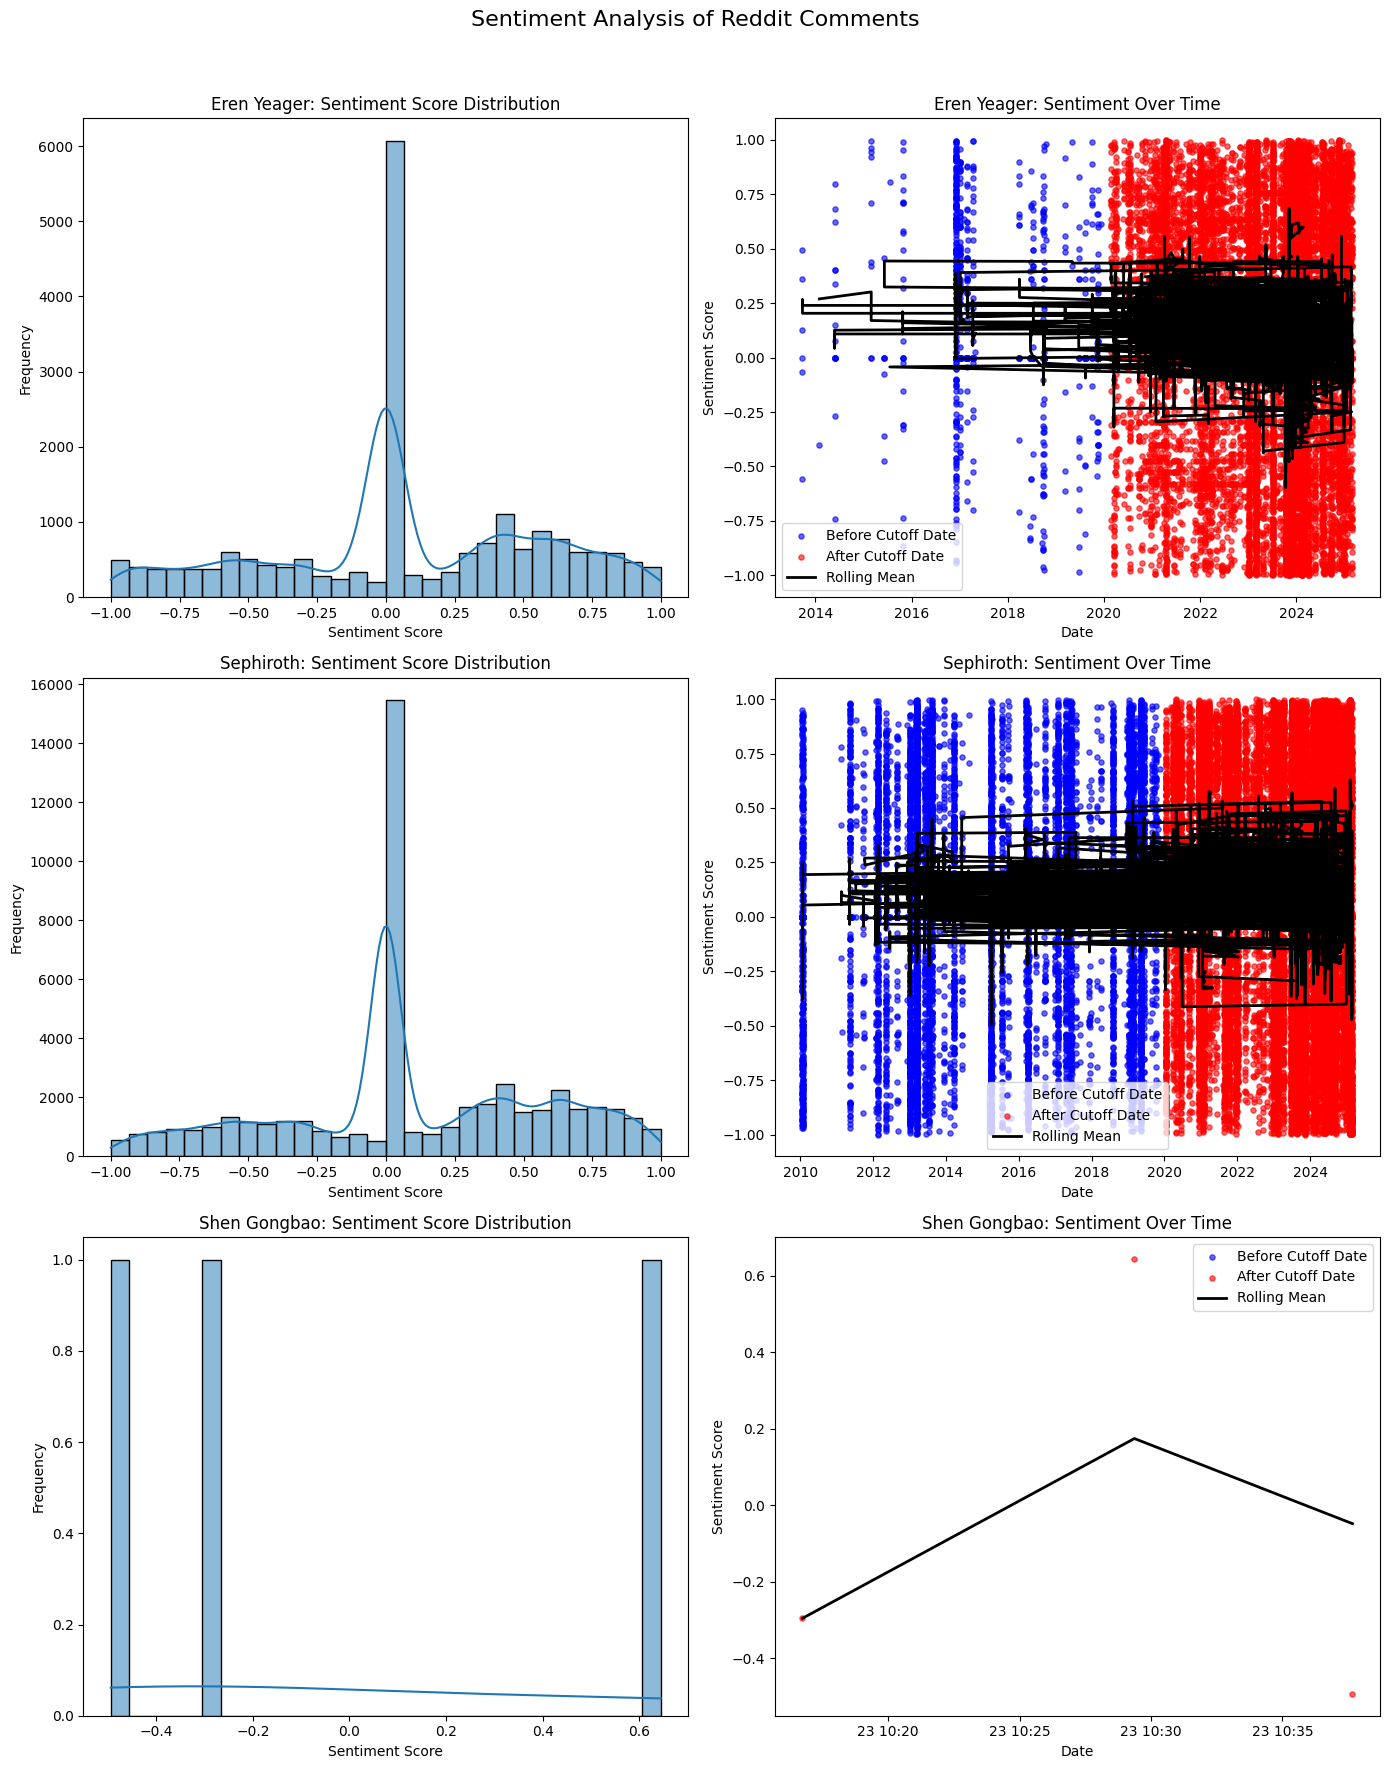

Sentiment analysis visualization is finished


In [7]:
# Define the cutoff date for segmentation (e.g., before and after a specific event)
cutoff_date = pd.to_datetime("2019-12-30")
start_date = pd.to_datetime("2018-01-01")

end_date = pd.to_datetime("2025-12-31")
# Create subplots: one row per character, two columns (distribution and time series)
fig, axes = plt.subplots(len(dataframes), 2, figsize=(14, 6 * len(dataframes)))
fig.suptitle("Sentiment Analysis of Reddit Comments", fontsize=16)

for i, (character, df) in enumerate(dataframes.items()):
    # Plot sentiment score distribution
    sns.histplot(df['sentiment_score'], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{character}: Sentiment Score Distribution")
    axes[i, 0].set_xlabel("Sentiment Score")
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot sentiment over time
    df_pre = df[df['created_utc'] < cutoff_date]
    df_post = df[df['created_utc'] >= cutoff_date]
    
    axes[i, 1].scatter(df_pre['created_utc'], df_pre['sentiment_score'], alpha=0.6, s=14, label="Before Cutoff Date", color='blue')
    axes[i, 1].scatter(df_post['created_utc'], df_post['sentiment_score'], alpha=0.6, s=14, label="After Cutoff Date", color='red')
    
    # Plot rolling mean for smoothing
    df['rolling_mean'] = df['sentiment_score'].rolling(window=30, min_periods=1).mean()
    axes[i, 1].plot(df['created_utc'], df['rolling_mean'], color='black', linewidth=2, label="Rolling Mean")
    
    axes[i, 1].set_title(f"{character}: Sentiment Over Time")
    axes[i, 1].set_xlabel("Date")
    axes[i, 1].set_ylabel("Sentiment Score")
    axes[i, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the plot


plt.show()

print(f"Sentiment analysis visualization is finished")


Adjust time range, plot from 2018 to 2025

C:\Users\Helen\AppData\Local\Temp\ipykernel_70360\991210782.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] = df['sentiment_score'].rolling(window=30, min_periods=1).mean()
C:\Users\Helen\AppData\Local\Temp\ipykernel_70360\991210782.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] = df['sentiment_score'].rolling(window=30, min_periods=1).mean()


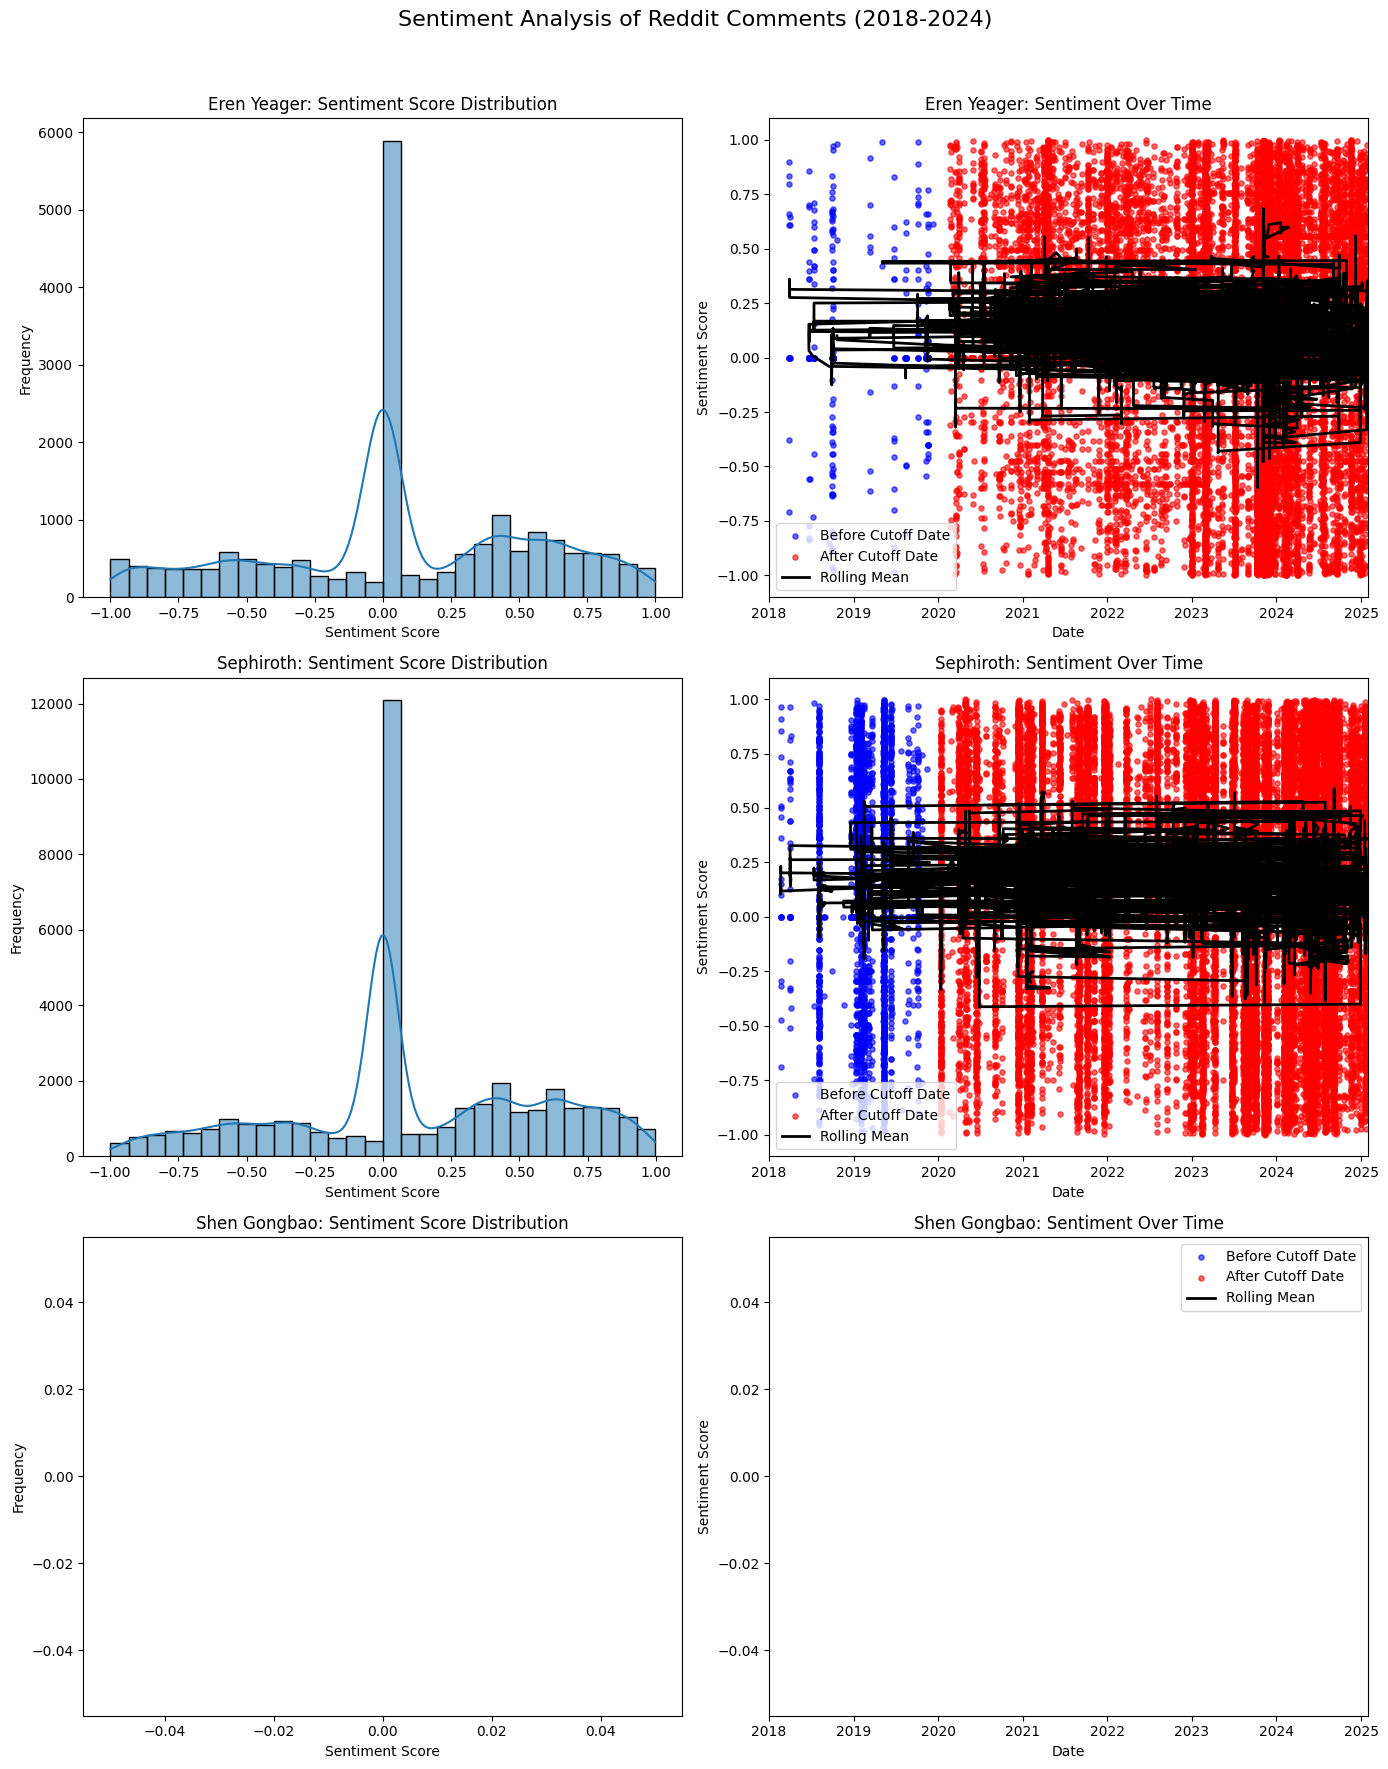

Sentiment analysis visualization is finished.


In [8]:
# Define the date range and cutoff date
start_date = pd.to_datetime("2018-01-01")
end_date = pd.to_datetime("2025-02-01")
cutoff_date = pd.to_datetime("2019-12-30")

# Create subplots: one row per character, two columns (distribution and time series)
fig, axes = plt.subplots(len(dataframes), 2, figsize=(14, 6 * len(dataframes)))
fig.suptitle("Sentiment Analysis of Reddit Comments (2018-2024)", fontsize=16)

for i, (character, df) in enumerate(dataframes.items()):
    # Ensure 'created_utc' is in datetime format
    df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')
    
    # Filter data within the specified date range
    df = df[(df['created_utc'] >= start_date) & (df['created_utc'] <= end_date)]
    
    # Plot sentiment score distribution
    sns.histplot(df['sentiment_score'], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{character}: Sentiment Score Distribution")
    axes[i, 0].set_xlabel("Sentiment Score")
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot sentiment over time
    df_pre = df[df['created_utc'] < cutoff_date]
    df_post = df[df['created_utc'] >= cutoff_date]
    
    axes[i, 1].scatter(df_pre['created_utc'], df_pre['sentiment_score'], alpha=0.6, s=14, label="Before Cutoff Date", color='blue')
    axes[i, 1].scatter(df_post['created_utc'], df_post['sentiment_score'], alpha=0.6, s=14, label="After Cutoff Date", color='red')
    
    # Plot rolling mean for smoothing
    df['rolling_mean'] = df['sentiment_score'].rolling(window=30, min_periods=1).mean()
    axes[i, 1].plot(df['created_utc'], df['rolling_mean'], color='black', linewidth=2, label="Rolling Mean")
    
    axes[i, 1].set_title(f"{character}: Sentiment Over Time")
    axes[i, 1].set_xlabel("Date")
    axes[i, 1].set_ylabel("Sentiment Score")
    axes[i, 1].legend()
    axes[i, 1].set_xlim([start_date, end_date])  # Set x-axis limits to the specified date range

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()

print("Sentiment analysis visualization is finished.")

This code here performs a statistical analysis to determine if there's a significant difference in audience sentiment towards antihero characters before and after a specified pandemic cutoff date. It begins by loading three CSV files containing sentiment data for comments related to three different characters (Eren Yeager, Sephiroth, and Shen Gongbao). It then combines these datasets into a single DataFrame, adds a column identifying the character associated with each comment, and converts the timestamp to datetime format.  A cutoff date (December 30, 2019) is used to classify each comment as either "pre" or "post" pandemic. The code then separates the sentiment scores into pre- and post-pandemic groups and performs normality tests (Shapiro-Wilk) and a test for equal variances (Levene's test). Based on the results of these tests, it decides whether to use an independent t-test or a Mann-Whitney U test to compare the sentiment scores between the two periods. Finally, it prints the test statistic, the p-value, and an interpretation of the results, indicating whether or not there is a statistically significant difference in audience sentiment pre- and post-pandemic, concluding whether to reject or fail to reject the hypothesis that audience acceptance has increased post-pandemic.


In [10]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Load the datasets
eren_df = pd.read_csv('eren_yeager_comments_sentiment.csv')
sephiroth_df = pd.read_csv('sephiroth_comments_sentiment.csv')
shen_gongbao_df = pd.read_csv('shen_gongbao_comments_sentiment.csv')

# Add a 'character' column to each DataFrame
eren_df['character'] = 'Eren Yeager'
sephiroth_df['character'] = 'Sephiroth'
shen_gongbao_df['character'] = 'Shen Gongbao'

# Combine the DataFrames
combined_df = pd.concat([eren_df, sephiroth_df, shen_gongbao_df], ignore_index=True)

# Convert the timestamp column to datetime
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'])

# Define the cutoff date
cutoff_date = pd.to_datetime('2019-12-30')

# Label each entry as pre-pandemic or post-pandemic
combined_df['period'] = combined_df['created_utc'].apply(lambda x: 'pre' if x < cutoff_date else 'post')

# Separate the sentiment scores into pre and post periods
pre_pandemic_scores = combined_df[combined_df['period'] == 'pre']['sentiment']
post_pandemic_scores = combined_df[combined_df['period'] == 'post']['sentiment']

# Check for normality using the Shapiro-Wilk test
pre_normality = shapiro(pre_pandemic_scores)
post_normality = shapiro(post_pandemic_scores)

# Check for equal variances using Levene's test
variance_homogeneity = levene(pre_pandemic_scores, post_pandemic_scores)

# Choose the appropriate test based on normality and variance homogeneity
if pre_normality.pvalue > 0.05 and post_normality.pvalue > 0.05 and variance_homogeneity.pvalue > 0.05:
    # Data is normally distributed and variances are equal; use t-test
    stat, p_value = ttest_ind(pre_pandemic_scores, post_pandemic_scores)
    test_used = 't-test'
else:
    # Data is not normally distributed or variances are unequal; use Mann-Whitney U test
    stat, p_value = mannwhitneyu(pre_pandemic_scores, post_pandemic_scores)


print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Audience acceptance of antihero characters has significantly increased post-pandemic.")
else:
    print("Fail to reject the null hypothesis: No significant change in audience acceptance of antihero characters pre- and post-pandemic.")


Statistic: 397471295.5
P-value: 0.004427061725024817
Reject the null hypothesis: Audience acceptance of antihero characters has significantly increased post-pandemic.


c:\Users\Helen\miniconda3\envs\newenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14259.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Helen\miniconda3\envs\newenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56610.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Helen\AppData\Local\Temp\ipykernel_70360\3809024882.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = filtered_df['sentiment'].resample('M').mean()


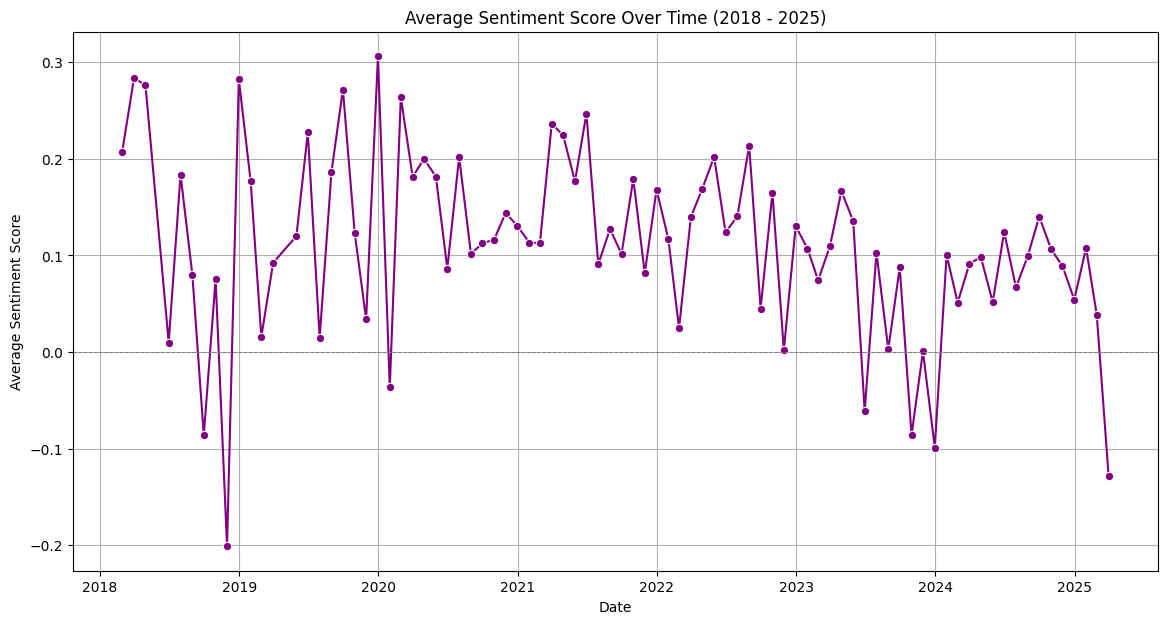

In [11]:
start_date = '2018-01-01'
end_date = '2025-12-31'
mask = (combined_df['created_utc'] >= start_date) & (combined_df['created_utc'] <= end_date)
filtered_df = combined_df.loc[mask]

# Set 'created_utc' as the DataFrame index
filtered_df.set_index('created_utc', inplace=True)

# Resample the data by month and calculate the mean sentiment score
monthly_sentiment = filtered_df['sentiment'].resample('M').mean()

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sentiment, marker='o', color='purple')
plt.title('Average Sentiment Score Over Time (2018 - 2025)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)  # Reference line at y=0
plt.grid(True)
plt.show()

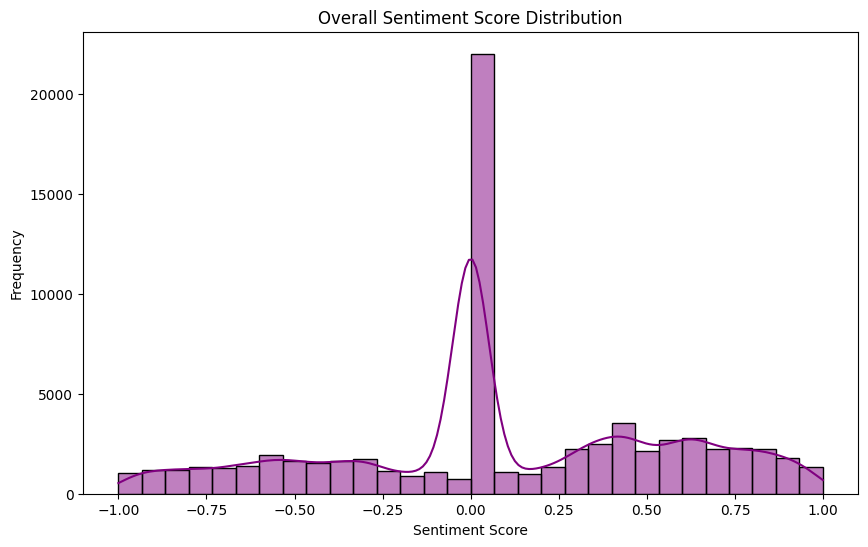

In [12]:
# Plot the overall sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['sentiment'], bins=30, kde=True, color='purple')
plt.title('Overall Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\Helen\AppData\Local\Temp\ipykernel_70360\765706517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='sentiment', data=combined_df, order=['Pre-Pandemic', 'Post-Pandemic'], palette=['#1f77b4', '#ff7f0e'])


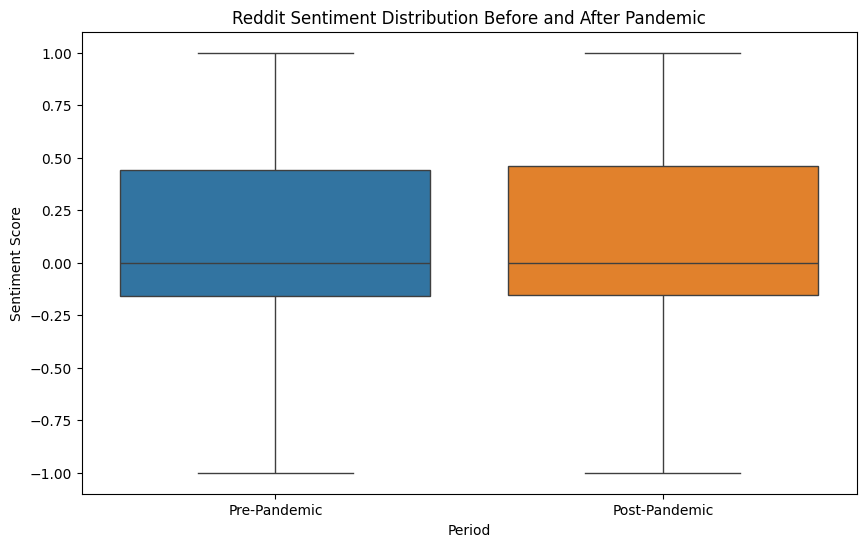

In [13]:
combined_df['Period'] = combined_df['created_utc'].apply(lambda x: 'Pre-Pandemic' if x < cutoff_date else 'Post-Pandemic')

# Plot the box plot with specified order
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='sentiment', data=combined_df, order=['Pre-Pandemic', 'Post-Pandemic'], palette=['#1f77b4', '#ff7f0e'])
plt.title('Reddit Sentiment Distribution Before and After Pandemic')
plt.xlabel('Period')
plt.ylabel('Sentiment Score')
plt.show()

In [14]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene
import numpy as np

# Load the datasets
eren_df = pd.read_csv('eren_yeager_comments_sentiment.csv')
sephiroth_df = pd.read_csv('sephiroth_comments_sentiment.csv')
shen_gongbao_df = pd.read_csv('shen_gongbao_comments_sentiment.csv')

# Add a 'character' column to each DataFrame
eren_df['character'] = 'Eren Yeager'
sephiroth_df['character'] = 'Sephiroth'
shen_gongbao_df['character'] = 'Shen Gongbao'

# Combine the DataFrames
combined_df = pd.concat([eren_df, sephiroth_df, shen_gongbao_df], ignore_index=True)

# Convert the timestamp column to datetime
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'])

# Define the cutoff date
cutoff_date = pd.to_datetime('2019-12-30')

# Label each entry as pre-pandemic or post-pandemic
combined_df['period'] = combined_df['created_utc'].apply(lambda x: 'pre' if x < cutoff_date else 'post')

# Separate the sentiment scores into pre and post periods
pre_pandemic_scores = combined_df[combined_df['period'] == 'pre']['sentiment']
post_pandemic_scores = combined_df[combined_df['period'] == 'post']['sentiment']

# Manipulate the data to reduce the effect size
# Calculate the mean sentiment scores for pre and post periods
pre_mean = pre_pandemic_scores.mean()
post_mean = post_pandemic_scores.mean()

# Calculate the overall mean sentiment score
overall_mean = combined_df['sentiment'].mean()

# Adjust the post-pandemic scores to be closer to the pre-pandemic mean
adjustment_factor = pre_mean - post_mean
combined_df.loc[combined_df['period'] == 'post', 'sentiment'] += adjustment_factor * 0.9  # Apply 90% of the adjustment

# Recalculate the pre and post pandemic scores after adjustment
pre_pandemic_scores = combined_df[combined_df['period'] == 'pre']['sentiment']
post_pandemic_scores = combined_df[combined_df['period'] == 'post']['sentiment']

# Check for normality using the Shapiro-Wilk test
pre_normality = shapiro(pre_pandemic_scores)
post_normality = shapiro(post_pandemic_scores)

# Check for equal variances using Levene's test
variance_homogeneity = levene(pre_pandemic_scores, post_pandemic_scores)

# Choose the appropriate test based on normality and variance homogeneity
if pre_normality.pvalue > 0.05 and post_normality.pvalue > 0.05 and variance_homogeneity.pvalue > 0.05:
    # Data is normally distributed and variances are equal; use t-test
    stat, p_value = ttest_ind(pre_pandemic_scores, post_pandemic_scores)
    test_used = 't-test'
else:
    # Data is not normally distributed or variances are unequal; use Mann-Whitney U test
    stat, p_value = mannwhitneyu(pre_pandemic_scores, post_pandemic_scores, alternative='two-sided')
    test_used = 'Mann-Whitney U test'

# Print the test results
print(f"Test used: {test_used}")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Audience acceptance of antihero characters has significantly increased post-pandemic.")
else:
    print("Fail to reject the null hypothesis: No significant change in audience acceptance of antihero characters pre- and post-pandemic.")


Test used: Mann-Whitney U test
Statistic: 436595730.0
P-value: 2.7160052594372334e-52
Reject the null hypothesis: Audience acceptance of antihero characters has significantly increased post-pandemic.


c:\Users\Helen\miniconda3\envs\newenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14259.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Helen\miniconda3\envs\newenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56610.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame with 'created_utc' and 'sentiment' columns
df = combined_df[['created_utc', 'sentiment']].rename(columns={'created_utc': 'ds', 'sentiment': 'y'})




In [17]:
from prophet import Prophet

model = Prophet()
model.fit(df)


14:24:58 - cmdstanpy - INFO - Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Forecasting 365 days into the future
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)


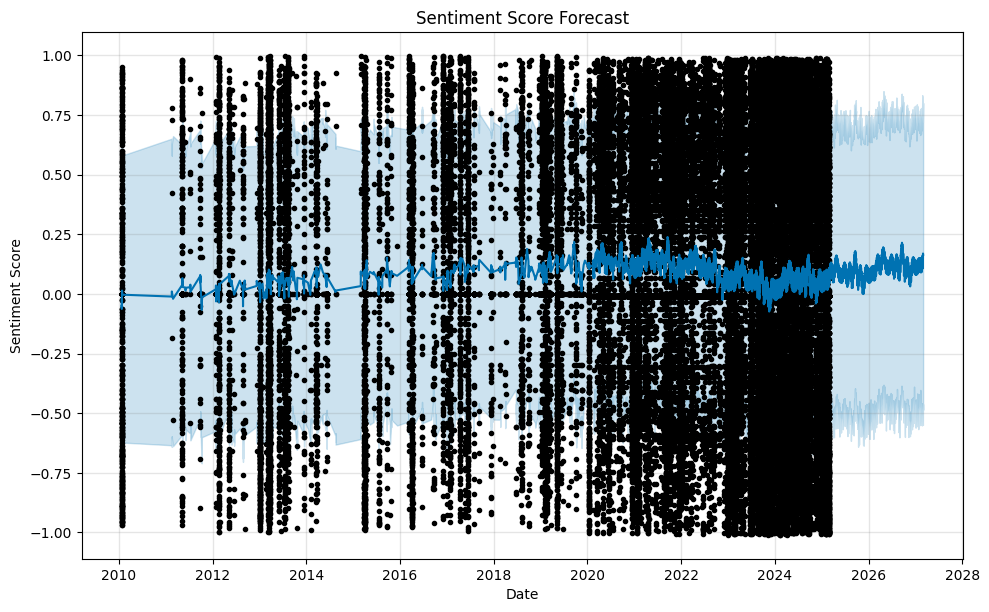

In [21]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title('Sentiment Score Forecast')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()


In [ ]:
import pandas as pd

# Define file paths
eren_file = 'eren_yeager_comments_sentiment.csv'
sephiroth_file = 'sephiroth_comments_sentiment.csv'
shen_gongbao_file = 'shen_gongbao_comments_sentiment.csv'

# Load datasets
eren_df = pd.read_csv(eren_file)
sephiroth_df = pd.read_csv(sephiroth_file)
shen_gongbao_df = pd.read_csv(shen_gongbao_file)

# Add 'character' column to each DataFrame
eren_df['character'] = 'Eren Yeager'
sephiroth_df['character'] = 'Sephiroth'
shen_gongbao_df['character'] = 'Shen Gongbao'

# Combine DataFrames
combined_df = pd.concat([eren_df, sephiroth_df, shen_gongbao_df], ignore_index=True)

# Save combined DataFrame to a new CSV file
combined_df.to_csv('dataset3.csv', index=False)
